In [1]:
# Load "numpy" and "pandas" for manipulating numbers and data frames
# Load "matplotlib.pyplot" and "seaborn" for data visualisation
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Creation of data frame using csv file
data = pd.read_csv("ocd_patient_dataset.csv")

In [3]:
# A brief look at the data
data.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [4]:
# Get the dimensions of the dataframe
data.shape

(1500, 17)

In [5]:
# Get the row names of the dataframe
data.index

RangeIndex(start=0, stop=1500, step=1)

In [6]:
# Look at basic information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [7]:
#Checking for the null vaules
data.isnull().sum()

Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Duration of Symptoms (months)      0
Previous Diagnoses               248
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                      386
dtype: int64

In [8]:
# Inserting the values at null positions(Since previous diag)
data['Previous Diagnoses'] = data['Previous Diagnoses'].fillna('Unknown')
data['Medications'] = data['Medications'].fillna('Unknown')

In [9]:
#Checking for the null vaules after the fill operations
data.isnull().sum()

Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
OCD Diagnosis Date               0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type                   0
Compulsion Type                  0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
Depression Diagnosis             0
Anxiety Diagnosis                0
Medications                      0
dtype: int64

In [10]:
# Droping Patient ID column
data.drop(columns=['Patient ID'], axis=1, inplace=True)

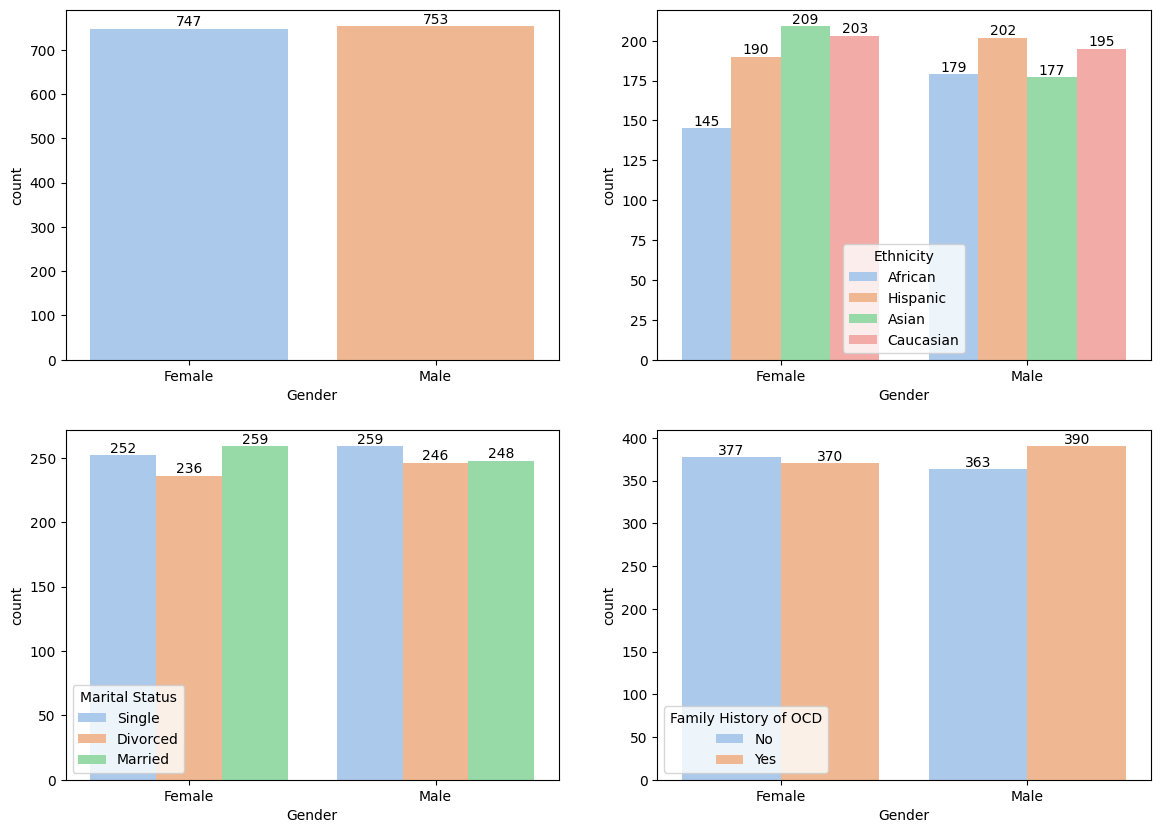

In [11]:
# plotting a bar chart for Gender and it's variation with different columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax = sns.countplot(x='Gender',data = data, palette="pastel",hue='Gender', ax=axes[0, 0])
for bars in ax.containers:
    ax.bar_label(bars)
ax = sns.countplot(x='Gender',data = data, palette="pastel",hue='Ethnicity', ax=axes[0, 1])
for bars in ax.containers:
    ax.bar_label(bars)
ax = sns.countplot(x='Gender',data = data, palette="pastel",hue='Marital Status', ax=axes[1, 0])
for bars in ax.containers:
    ax.bar_label(bars)
ax = sns.countplot(x='Gender',data = data, palette="pastel",hue='Family History of OCD', ax=axes[1, 1])
for bars in ax.containers:
    ax.bar_label(bars)

**Observation** The following observations we can conclude from the above graphs 
1. Chances of males gettng OCD is greater than females
2. As per ethnicity Asian females have higher chances of having OCD, whereas in case of men Hispanic
3. As per marital status Married females have higher chances of having OCD, where in case of males Single person develop OCD more.
4. As per family history of OCD, Male tend to develop OCD more if parents have a history of OCD

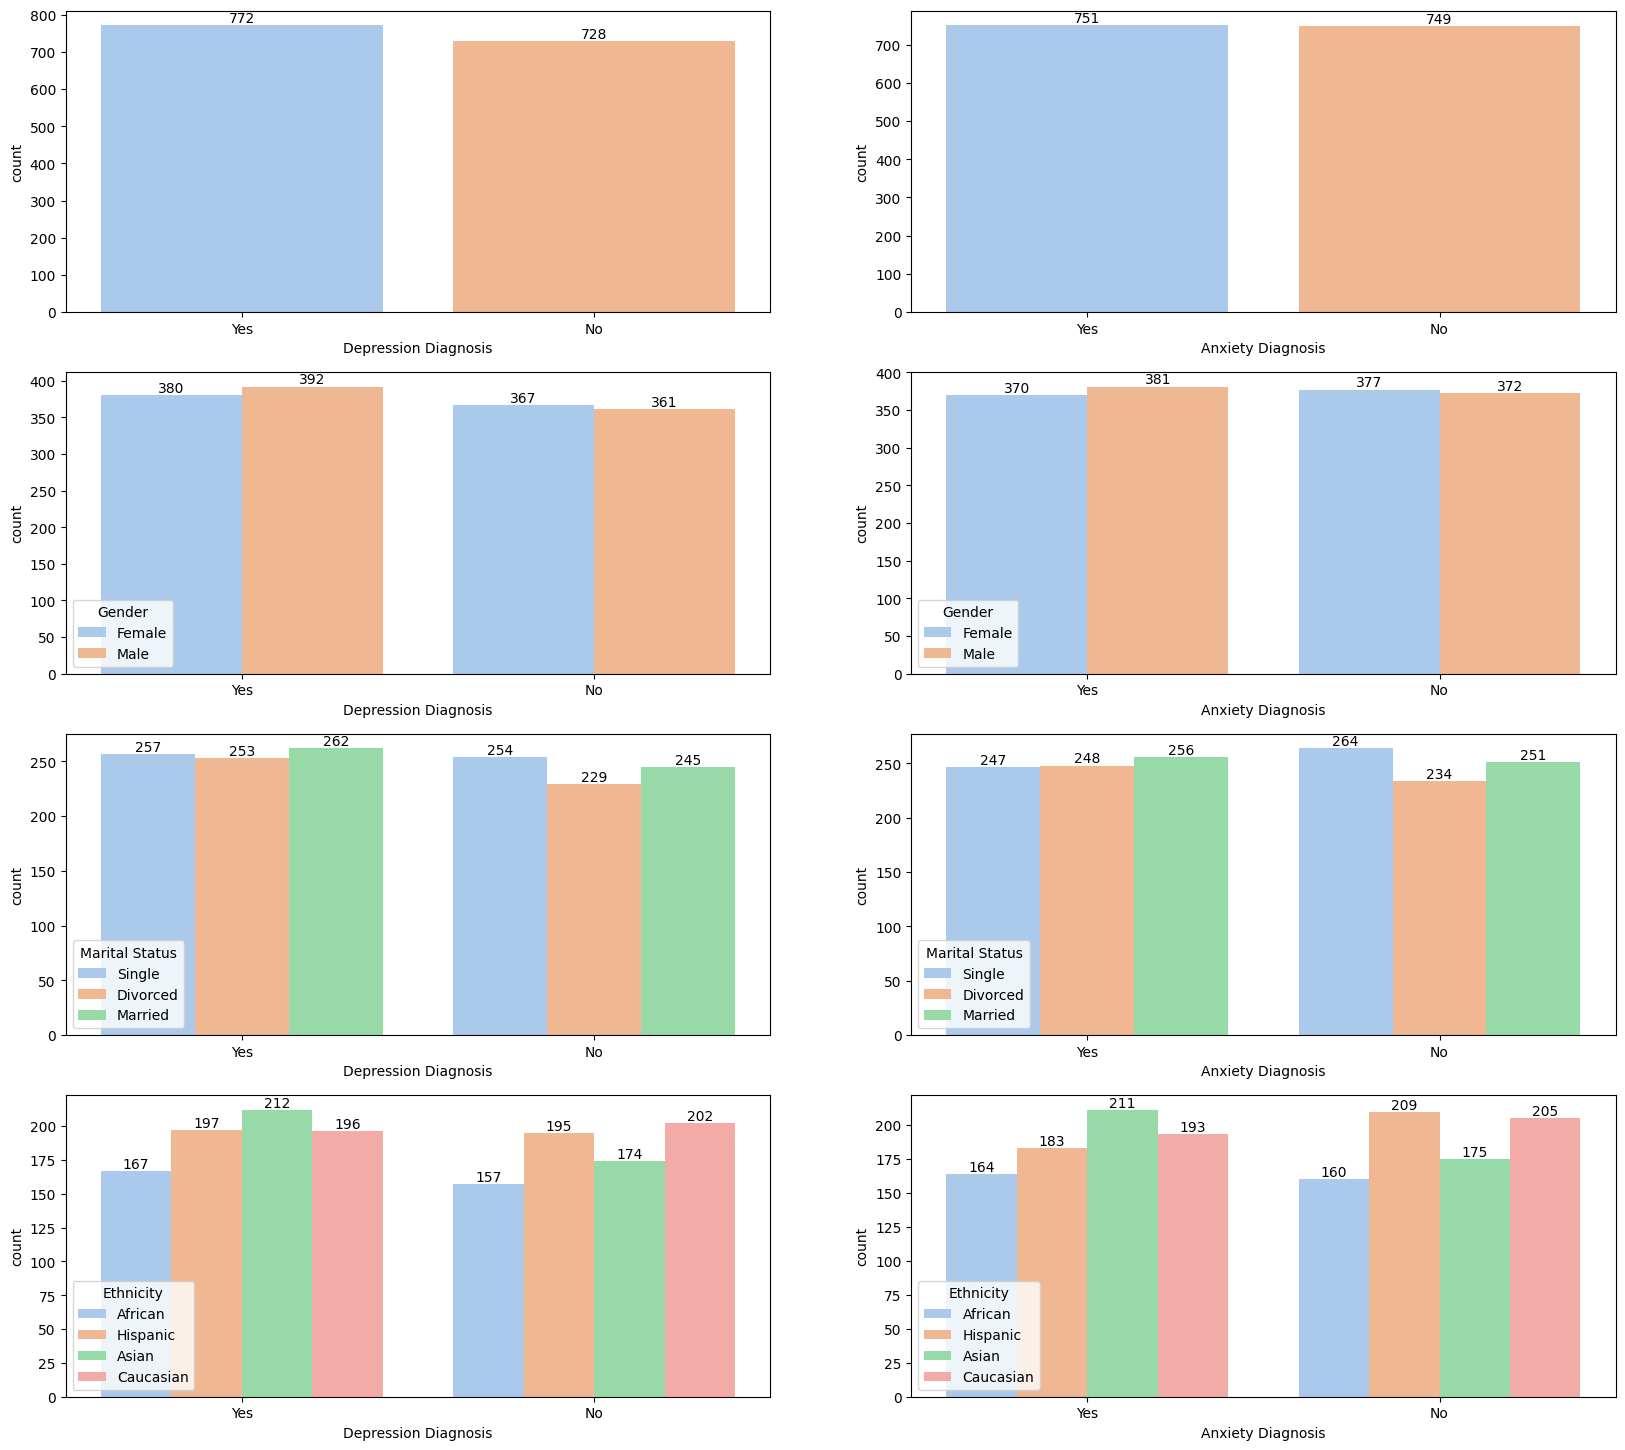

In [12]:
# plotting a bar chart for Depression and Anxiety with different columns as hue
fig, axes = plt.subplots(4, 2, figsize=(20, 18))
ax = sns.countplot(x='Depression Diagnosis',data = data, palette="pastel",hue='Depression Diagnosis', ax=axes[0, 0])
for bars in ax.containers:
    ax.bar_label(bars)
ax = sns.countplot(x='Anxiety Diagnosis',data = data, palette="pastel",hue='Anxiety Diagnosis', ax=axes[0, 1])
for bars in ax.containers:
    ax.bar_label(bars)
ax = sns.countplot(x='Depression Diagnosis',data = data, palette="pastel",hue='Gender', ax=axes[1, 0])
for bars in ax.containers:
    ax.bar_label(bars)
ax = sns.countplot(x='Anxiety Diagnosis',data = data, palette="pastel",hue='Gender', ax=axes[1, 1])
for bars in ax.containers:
    ax.bar_label(bars)
ax = sns.countplot(x='Depression Diagnosis',data = data, palette="pastel",hue='Marital Status', ax=axes[2, 0])
for bars in ax.containers:
    ax.bar_label(bars)
ax = sns.countplot(x='Anxiety Diagnosis',data = data, palette="pastel",hue='Marital Status', ax=axes[2, 1])
for bars in ax.containers:
    ax.bar_label(bars)
ax = sns.countplot(x='Depression Diagnosis',data = data, palette="pastel",hue='Ethnicity', ax=axes[3, 0])
for bars in ax.containers:
    ax.bar_label(bars)
ax = sns.countplot(x='Anxiety Diagnosis',data = data, palette="pastel",hue='Ethnicity', ax=axes[3, 1])
for bars in ax.containers:
    ax.bar_label(bars)

**Observation** The following observations we can conclude from the above graphs
1. The OCD patients are more likely to develop the problem of depression and anxiety as well
2. In case of gender category males tend to develop the problem of depression and anxiety more as compare to females
3. In case of marital-status category married people tend to develop the problem of depression and anxiety more as compare to singles or divorced
4. In case of ethnicity category Asian people tend to develop the problem of depression and anxiety more

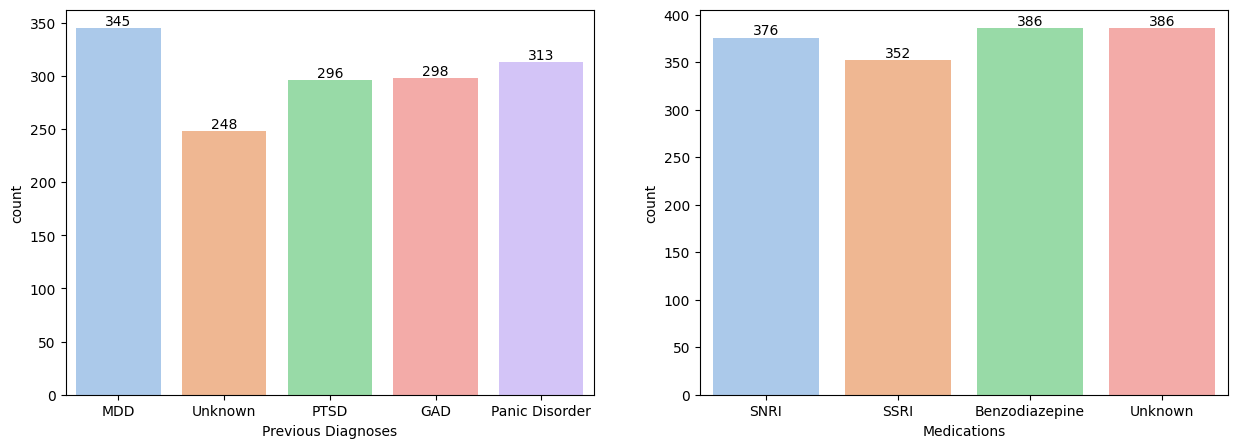

In [13]:
# plotting a bar chart for Depression and Anxiety with different columns as hue
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax = sns.countplot(x='Previous Diagnoses',data = data, palette="pastel",hue='Previous Diagnoses', ax=axes[0])
for bars in ax.containers:
    ax.bar_label(bars)
ax = sns.countplot(x='Medications',data = data, palette="pastel",hue='Medications', ax=axes[1])
for bars in ax.containers:
    ax.bar_label(bars)

**Observaton** The following observations we can conclude from the above graphs
1. Patients having previous diagnoses with disease like MDD, PTSD, GAD or Panic Disorder would likely to have OCD
2. Benzodiazepine is the most used medicine for curing the OCD disease 

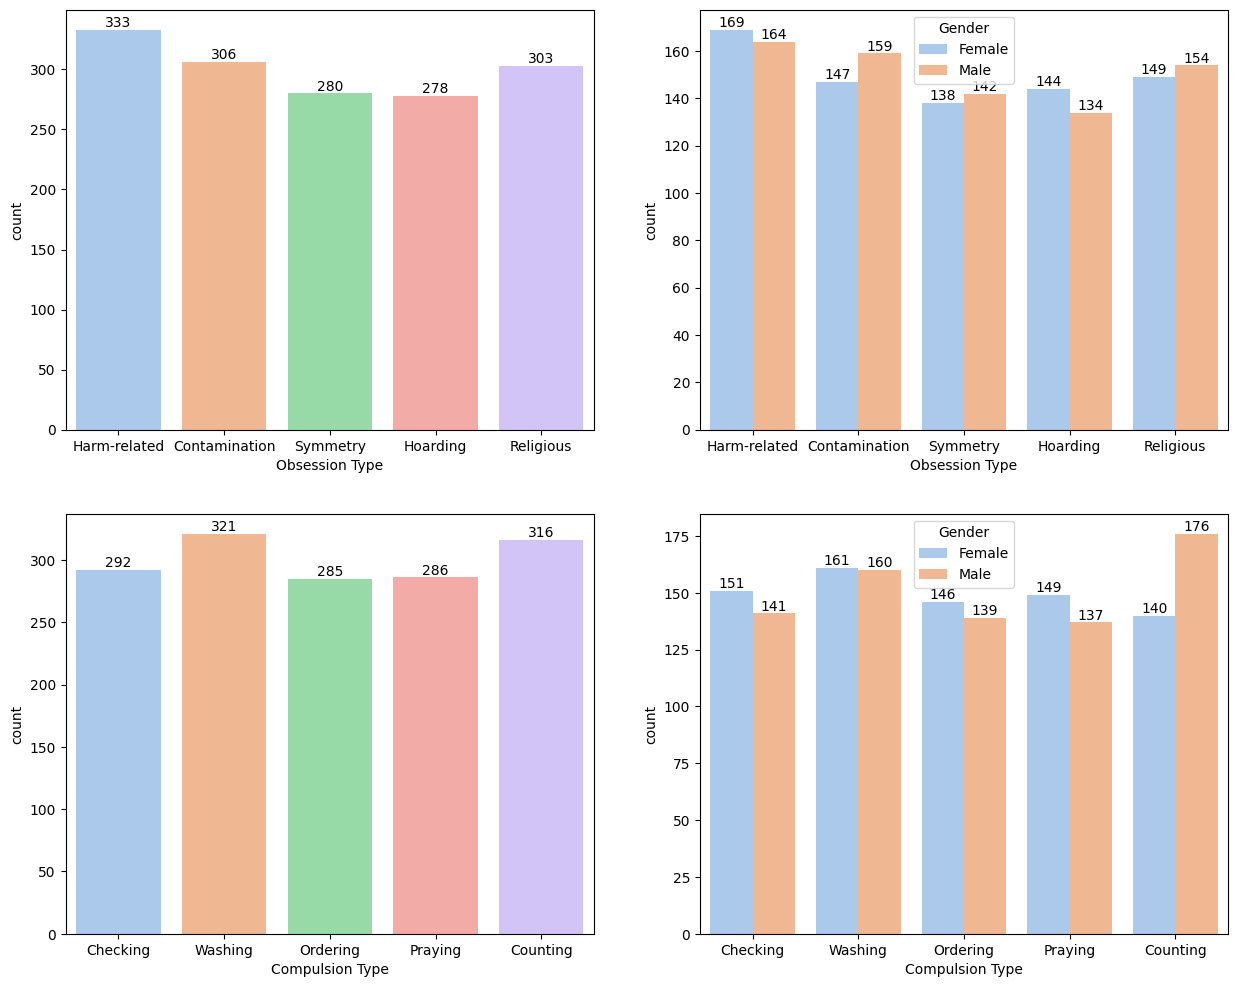

In [14]:
# plotting a bar chart for Depression and Anxiety with different columns as hue
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
ax = sns.countplot(x='Obsession Type',data = data, palette="pastel",hue='Obsession Type', ax=axes[0,0])
for bars in ax.containers:
    ax.bar_label(bars)
ax = sns.countplot(x='Obsession Type',data = data, palette="pastel",hue='Gender', ax=axes[0,1])
for bars in ax.containers:
    ax.bar_label(bars)
ax = sns.countplot(x='Compulsion Type',data = data, palette="pastel",hue='Compulsion Type', ax=axes[1,0])
for bars in ax.containers:
    ax.bar_label(bars)
ax = sns.countplot(x='Compulsion Type',data = data, palette="pastel",hue='Gender', ax=axes[1,1])
for bars in ax.containers:
    ax.bar_label(bars)

**Observaton** The following observations we can conclude from the above graphs
1. In the obsession type, harm-related category is highest among males and females both
2. In compulsion type, females are highest at washing category while males are highest at counting category 

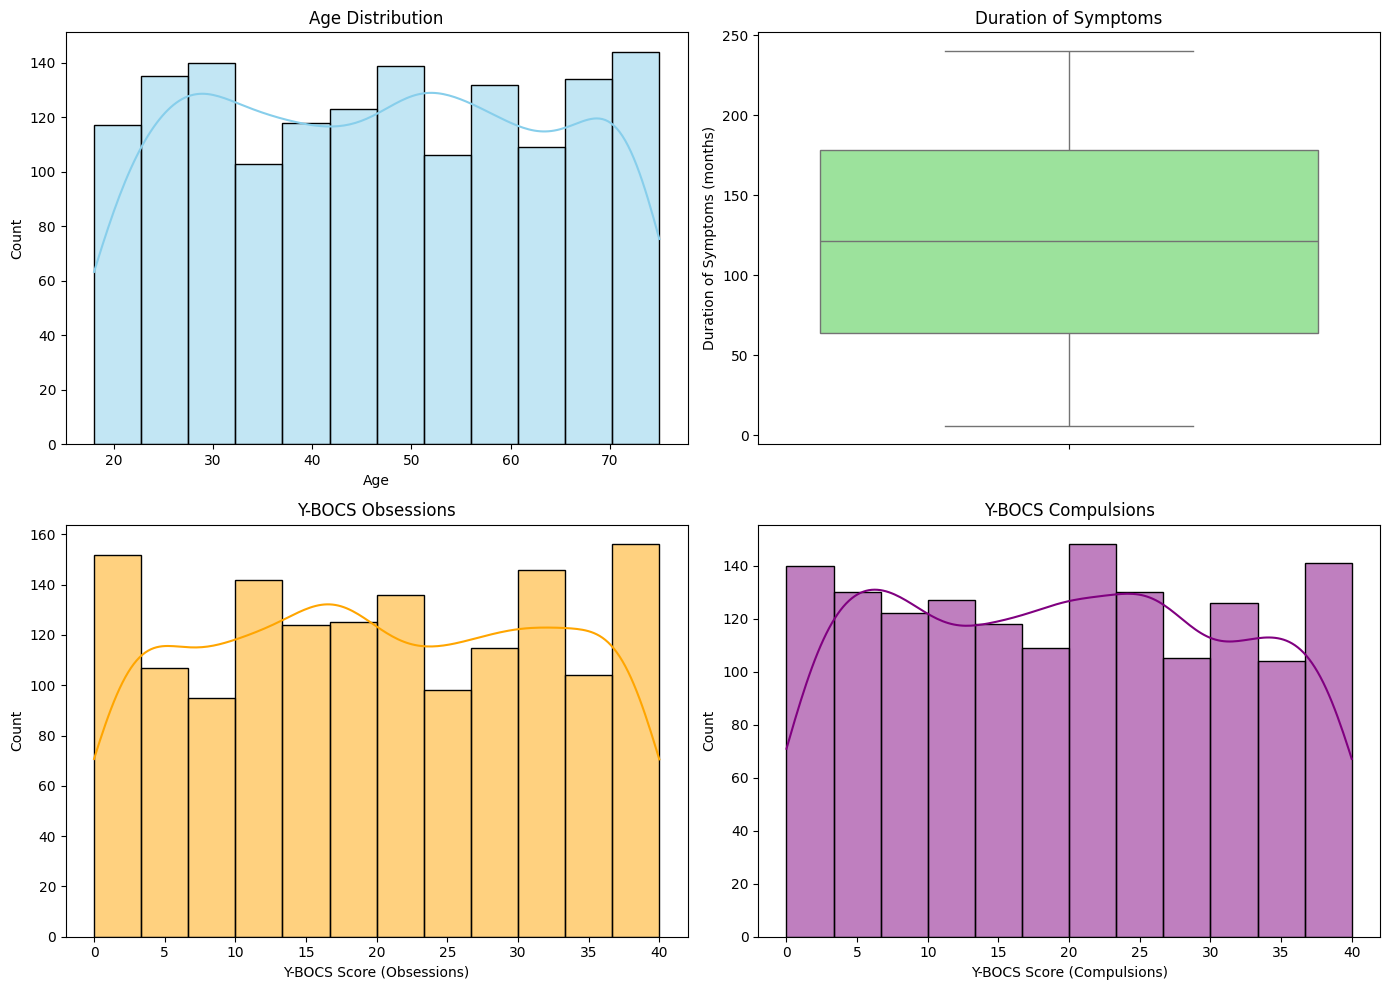

Skewness for AGE: 0.005451711568436306
Skewness for Y-BOCS Score (Obsessions): -0.0037306223394405645
Skewness for Y-BOCS Score (Compulsions): 0.039490278015678684
q1, median and q3 for Duration of symptoms: 64.0,121.0,178.0 


In [15]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(data['Age'], kde=True, ax=axes[0, 0], color="skyblue").set_title("Age Distribution")
sns.boxplot(data=data['Duration of Symptoms (months)'], ax=axes[0, 1], color="lightgreen").set_title("Duration of Symptoms")
sns.histplot(data['Y-BOCS Score (Obsessions)'], kde=True, ax=axes[1, 0], color="orange").set_title("Y-BOCS Obsessions")
sns.histplot(data['Y-BOCS Score (Compulsions)'], kde=True, ax=axes[1, 1], color="purple").set_title("Y-BOCS Compulsions")
plt.tight_layout()
plt.show()
print(f"Skewness for AGE: {data['Age'].skew()}"  )
print(f"Skewness for Y-BOCS Score (Obsessions): {data['Y-BOCS Score (Obsessions)'].skew()}"  )
print(f"Skewness for Y-BOCS Score (Compulsions): {data['Y-BOCS Score (Compulsions)'].skew()}"  )
print(f"q1, median and q3 for Duration of symptoms: {data['Duration of Symptoms (months)'].quantile(0.25)},{data['Duration of Symptoms (months)'].median()},{data['Duration of Symptoms (months)'].quantile(0.75)} ")


**Observation** The following observations we can conclude from the above graphs
1. The plots for Age, Y-BOCS Score(Obsession and Compulsions) are not uniformly distributed, there is skewness in these plots
2. The box plot for Duration of Symptoms (months) shows that median of duration is 121 months and minimum duraton for OCD symptoms is 64 months and maximum it can last upto 178 months 

In [16]:
# Analysis based on Gender(group by mechanism)
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("Group by gender")
for column in numerical_columns:
    value = data.groupby('Gender')[column].mean()
    print(f"Column: {column} : mean \n {value}\n")

Group by gender
Column: Age : mean 
 Gender
Female    46.933066
Male      46.630810
Name: Age, dtype: float64

Column: Duration of Symptoms (months) : mean 
 Gender
Female    121.009371
Male      122.475432
Name: Duration of Symptoms (months), dtype: float64

Column: Y-BOCS Score (Obsessions) : mean 
 Gender
Female    20.195448
Male      19.901726
Name: Y-BOCS Score (Obsessions), dtype: float64

Column: Y-BOCS Score (Compulsions) : mean 
 Gender
Female    19.597055
Male      19.654714
Name: Y-BOCS Score (Compulsions), dtype: float64



**Observation** The following observations we can conclude from the above analysis
1. There is no significant dfference between the mean of male and female for the features Age, Y-BOCS Score (Compulsions).
2. There is slight difference between the mean of male and female for the features Duration of Symptoms (months) i.e females take more time for recovery than males.


In [17]:
# Analysis based on Family History of OCD(group by mechanism)
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("Group by Family History of OCD")
for column in numerical_columns:
    value = data.groupby('Family History of OCD')[column].mean()
    print(f"Column: {column} : mean \n {value}\n")

Group by Family History of OCD
Column: Age : mean 
 Family History of OCD
No     46.152703
Yes    47.393421
Name: Age, dtype: float64

Column: Duration of Symptoms (months) : mean 
 Family History of OCD
No     120.837838
Yes    122.628947
Name: Duration of Symptoms (months), dtype: float64

Column: Y-BOCS Score (Obsessions) : mean 
 Family History of OCD
No     20.108108
Yes    19.989474
Name: Y-BOCS Score (Obsessions), dtype: float64

Column: Y-BOCS Score (Compulsions) : mean 
 Family History of OCD
No     19.981081
Yes    19.280263
Name: Y-BOCS Score (Compulsions), dtype: float64



**Observation** The following observations we can conclude from the above analysis
1. There is no significant dfference between the mean of patient having family history of OCD or not for the features Age, Y-BOCS Score (Compulsions).
2. There is slight difference between the mean of patient having family history of OCD or not for the features Duration of Symptoms (months) i.e patient having family history take more time to recover

In [18]:
# Creating age buckets
data['Age Group'] = pd.cut(data['Age'], bins=[0, 25, 50, 75], labels=['Young', 'Middle-aged', 'Older'])

# Mean Y-BOCS Scores by Age Group
age_group_stats = data.groupby('Age Group')[
    ['Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)','Duration of Symptoms (months)']
].mean()
print("\nMean Y-BOCS Scores by Age Group:\n", age_group_stats)



Mean Y-BOCS Scores by Age Group:
              Y-BOCS Score (Obsessions)  Y-BOCS Score (Compulsions)  \
Age Group                                                            
Young                        20.083770                   19.015707   
Middle-aged                  20.150077                   19.589587   
Older                        19.935976                   19.839939   

             Duration of Symptoms (months)  
Age Group                                   
Young                           120.366492  
Middle-aged                     123.756508  
Older                           120.144817  


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17480\3525241198.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = data.groupby('Age Group')[


**Observaton** The following observations we can conclude from the above analysis
1. Middle-aged group people take more time to recover than the younger and older age group
2. The Y-BOCS score for compulsion doesn't have much difference for the three different age group whereas for obsession there is a slight difference.

**Conclusion**
The analysis of the OCD patient dataset, enriched by the detailed observations and visualizations from the notebook, provides critical insights into the patterns and characteristics of OCD. These findings offer significant implications for treatment strategies, preventive measures, and holistic mental health care.

***Gender-Specific Insights***

***Prevalence***: Males are more likely to develop OCD than females.
***Symptoms***:
Obsession scores (Y-BOCS) are higher in females, while compulsion scores are higher in males.
Males tend to develop harm-related obsessions, while females are more prevalent in washing compulsions.
Males take longer to recover from OCD compared to females.
***Comorbidities***: Males are more prone to depression and anxiety than females.

**Ethnicity and Cultural Influences**

***OCD Prevalence:***
Asian females and Hispanic males have higher chances of developing OCD.
Asian individuals are more likely to develop depression and anxiety alongside OCD.
***Treatment Strategies:*** Cultural sensitivity in diagnosis and treatment is critical to address these variations effectively.

**Marital Status and OCD**

Married females and single males are at a higher risk of developing OCD.
Depression and anxiety are more prevalent among married individuals compared to singles or divorced individuals, highlighting the need for focused mental health care in this group.

**Family History and Recovery**

***Family Influence:***
Males with a family history of OCD are more likely to develop the disorder.
Patients with a family history of OCD take longer to recover, though their Y-BOCS scores for obsession and compulsion are lower compared to those without a family history.
Early screening and preventive interventions could mitigate the impact of familial risk factors.

**Clinical Patterns and Treatment Insights**

***Comorbidities:*** Patients with prior diagnoses such as MDD, PTSD, GAD, or Panic Disorder are more likely to develop OCD.
Medications: Benzodiazepines are the most frequently used medications, emphasizing the need for acute symptom management.
***Recovery Trends:***
Middle-aged individuals take the longest time to recover.
The duration of symptoms (median: 121 months) reflects the chronic nature of OCD.
Symptom Distribution: Y-BOCS scores for compulsion are higher in older individuals, while obsession scores peak in middle-aged individuals.

**Statistical Observations and Skewness**

The distributions of age and Y-BOCS scores (obsession and compulsion) show significant skewness, highlighting variability in symptom severity and age demographics.
The median duration of symptoms (~121 months) indicates that OCD tends to persist for extended periods without effective intervention.
